# Orders - Multivariate Regression of  the `review_score`

In [2]:
%load_ext autoreload
%autoreload 2

In [50]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [51]:
orders = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/2-ecommerce/data/tablon_primario.csv")
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_esperado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037


Let's recall our simple analysis from yesterday's exercise: 

¿ A qué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

In [52]:
from olist.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

In [53]:
round(orders.corr(numeric_only=True),2)

,Unnamed: 0,time_delta,tiempo_de_espera_real,tiempo_de_espera_esperado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
Unnamed: 0,1.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
time_delta,0.00,1.00,1.00,0.38,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera_real,0.00,1.00,1.00,0.39,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera_esperado,0.01,0.38,0.39,1.00,0.01,-0.05,0.03,-0.05,0.02,0.02,0.08,0.24,0.51
real_vs_esperado,0.00,0.70,0.70,0.01,1.00,-0.16,0.28,-0.27,-0.01,-0.02,0.02,0.02,0.07
es_cinco_estrellas,0.00,-0.23,-0.23,-0.05,-0.16,1.00,-0.40,0.79,-0.07,-0.07,-0.01,-0.06,-0.06
es_una_estrella,0.00,0.31,0.31,0.03,0.28,-0.40,1.00,-0.81,0.12,0.10,0.04,0.08,0.04
review_score,-0.00,-0.33,-0.33,-0.05,-0.27,0.79,-0.81,1.00,-0.12,-0.12,-0.03,-0.09,-0.06
num_de_produc,0.00,-0.02,-0.02,0.02,-0.01,-0.07,0.12,-0.12,1.00,0.29,0.15,0.44,-0.02
vendedores_unicos,0.00,-0.04,-0.04,0.02,-0.02,-0.07,0.10,-0.12,0.29,1.00,0.04,0.13,-0.01


<Axes: >

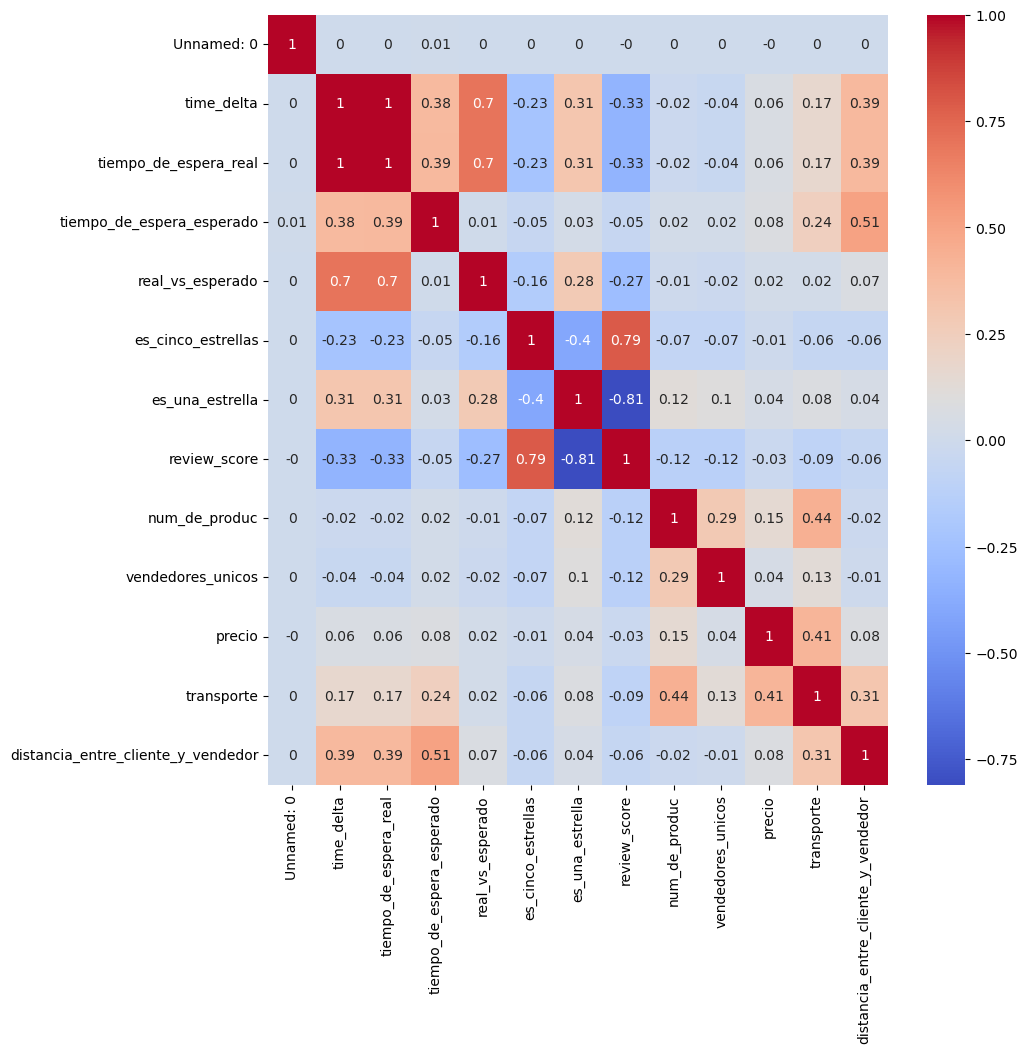

In [54]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

___

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

___

***Modelo 1***:

In [55]:
import statsmodels.formula.api as smf
modelo1 = smf.ols(formula='review_score ~ tiempo_de_espera_real', data=orders)
modelo1 = modelo1.fit()
print(modelo1.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:56:26   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

##### → **R-squared** = 0.112. Indica que solamente el 11.2% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (tiempo_de_espera). El otro 88.8% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

##### → **Coeficientes de regresión individuales**. El coeficiente negativo de tiempo_de_espera_real indica que a medida que aumenta el tiempo de espera real, el review_score tiende a disminuir. El coeficiente de tiempo_de_espera_real es -0.0454, lo que significa que por cada aumento de 1 en tiempo_de_espera_real, el review_score disminuye en 0.0454.
 
##### → **Valores 't'**. La estadística t para este coeficiente es muy grande. Es de -109.747, lo que indica que la estimación del coeficiente es altamente significativa.

##### → **Valores 'p'**. El valor p para este coeficiente es muy pequeño. Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

##### → **Intervalos de confianza del 95%**. Para este coeficiente el intervalo de confianza del 95% es de -0.046 a -0.045. No incluye cero, lo que apoya aún más la conclusión de que tiempo_de_espera_real tiene un efecto negativo significativo sobre review_score.

___

***Modelo 2***:

In [44]:
import statsmodels.formula.api as smf
modelo2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)
modelo2 = modelo2.fit()
print(modelo2.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:59:15   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

##### → **R-squared** = 0.74. Indica que solamente el 7.4% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (real_vs_esperado). El otro 92.6% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

##### → **Coeficientes de regresión individuales**. El coeficiente negativo de real_vs_esperado indica que a medida que aumenta el tiempo reaL_vs_esperado, el review_score tiende a disminuir. El coeficiente de real_vs_esperado es -0.0752, lo que significa que por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0752.
 
##### → **Valores 't'**. La estadística t para este coeficiente es muy grande. Es de -87.644, lo que indica que la estimación del coeficiente es altamente significativa.

##### → **Valores 'p'**. El valor p para este coeficiente es muy pequeño. Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

##### → **Intervalos de confianza del 95%**. Para este coeficiente el intervalo de confianza del 95% es de -0.077 a -0.073. No incluye cero, lo que apoya aún más la conclusión de que real_vs_esperado tiene un efecto negativo significativo sobre review_score.

___

## 2 - Multivariate regression

***Modelo 3***:

In [59]:
modelo3= smf.ols(formula='review_score ~ tiempo_de_espera_real + real_vs_esperado', data=orders)
modelo3 = modeo3.fit()
print(modelo3.summary())
coef_real_vs_esperado = modelo3.params['real_vs_esperado']
print(f"El impacto en review_score de agregar un día más de real_vs_esperado es {coef_real_vs_esperado:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:19:26   Log-Likelihood:            -1.5424e+05
No. Observations:               95857   AIC:                         3.085e+05
Df Residuals:                   95854   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [62]:
print(f"El coeficiente para tiempo_de_espera_real es {model3.params['tiempo_de_espera_real']:.4f}")
print(f"El coeficiente para real_vs_esperado es {model3.params['real_vs_esperado']:.4f}")

El coeficiente para tiempo_de_espera_real es -0.0383
El coeficiente para real_vs_esperado es -0.0205


***Responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,   `tiempo_de_espera` o `real_vs_esperado` ?



##### → El impacto de review_score agregrandole un día más de real_vs_esperado manteniendo todo lo otro constante es de -0.0205. Es decir, por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0205.

##### → La más explicativa de review_score es tiempo_de_espera_real, ya que tiene un coeficiente mayor que real_vs_esperado.

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

___

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [77]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'time_delta', 'tiempo_de_espera_real',
       'tiempo_de_espera_esperado', 'real_vs_esperado', 'es_cinco_estrellas',
       'es_una_estrella', 'review_score', 'num_de_produc', 'vendedores_unicos',
       'precio', 'transporte', 'distancia_entre_cliente_y_vendedor'],
      dtype='object')

In [78]:
# select features
features = ['tiempo_de_espera_real', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distancia_entre_cliente_y_vendedor']

In [85]:
from scipy.stats import zscore
import pandas as pd

columnas_para_transformar = ['tiempo_de_espera_real', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distancia_entre_cliente_y_vendedor']
orders_zscore = orders[columnas_para_transformar].apply(zscore)
orders[columnas_para_transformar] = orders_zscore
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_esperado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,-0.161781,0,0,4,-0.264603,-0.112554,-0.513784,-0.652018,-0.978986
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,-0.161781,0,0,4,-0.264603,-0.112554,-0.086646,0.000447,0.429687
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,-0.161781,1,0,5,-0.264603,-0.112554,0.111732,-0.164063,-0.145329
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,-0.161781,1,0,5,-0.264603,-0.112554,-0.441511,0.206782,2.053937
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,-0.161781,1,0,5,-0.264603,-0.112554,-0.562367,-0.652018,-0.958634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95852,95852,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,...,18.587442,-0.161781,1,0,5,-0.264603,-0.112554,-0.311506,-0.449401,-0.892578
95853,95853,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,...,23.459051,-0.161781,0,0,4,-0.264603,-0.112554,0.183957,-0.123168,-0.212604
95854,95854,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,...,30.384225,-0.161781,1,0,5,-0.264603,-0.112554,0.333655,1.964347,0.617501
95855,95855,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,...,37.105243,-0.161781,0,0,2,1.601496,-0.112554,1.075116,2.715332,-0.387298


Crear el `modelo4`

In [86]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera_real + real_vs_esperado + num_de_produc + vendedores_unicos + precio + transporte + distancia_entre_cliente_y_vendedor'

In [88]:
modelo4 = smf.ols(formula=formula, data=orders)
modelo4 = modelo4.fit()
print(modelo4.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:40:00   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust  

____

### → ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)

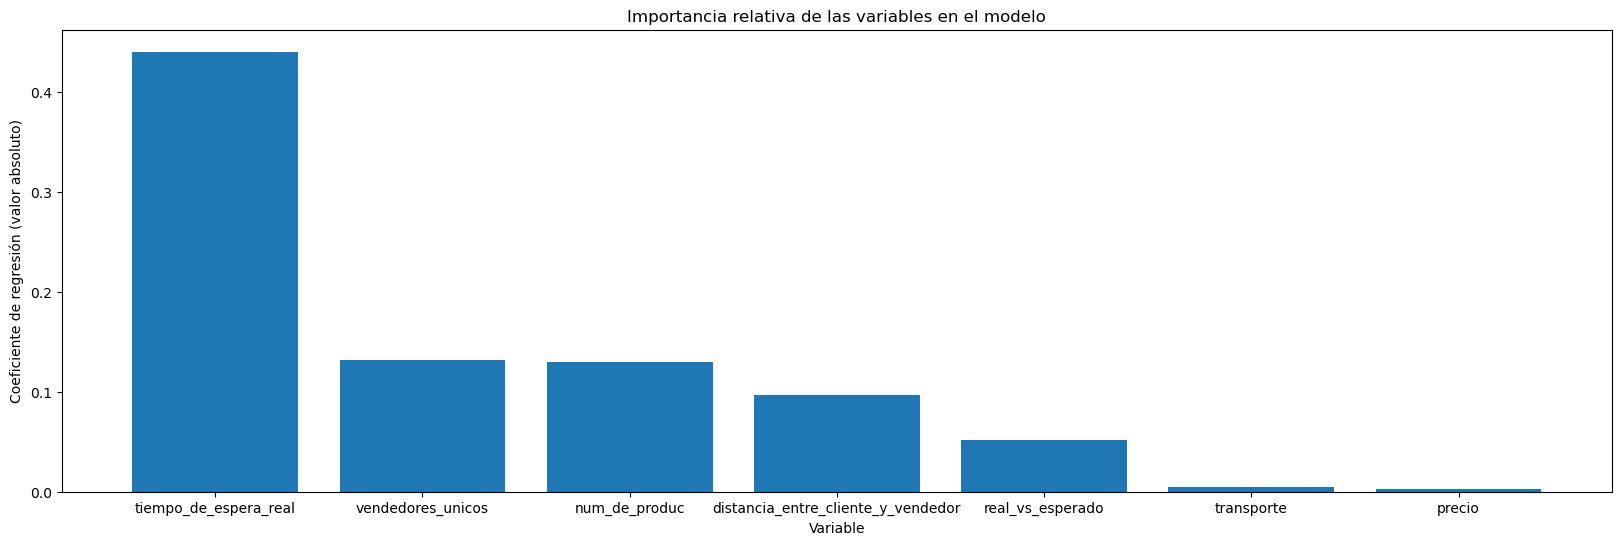

In [103]:
coeficientes_absolutos = abs(modelo4.params.drop('Intercept'))
coef_sorted = coeficientes_absolutos.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(coef_sorted.index, coef_sorted)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficiente de regresión (valor absoluto)')
ax.set_title('Importancia relativa de las variables en el modelo')
plt.show()

### → ¿Cómo ha cambiado el rendimiento general de la regresión?

##### El rendimiento general de la regresión se puede evaluar a través del valor R-squared. En este caso, el valor R-squared aumentó de 0.114 a 0.145 (del modelo3 al modelo4), lo que indica que el modelo 4 explica un poco más la variación de la variable dependiente (review_score) que el modelo 3.

### → ¿Es esta regresión estadísticamente significativa?

##### Sí, la regresión es estadísticamente significativa. Esto se peude determinar a través del valor p, que en este caso es 0.00. Un valor p menor que 0.05 indica que el modelo de regresión es estadísticamente significativo y que al menos una de las variables indepenedientes tiene une efecto significativo sobre la variable dependiente.

In [21]:
#


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





___

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [14]:
##codear

Computar rmse

In [15]:
##codear RMS (Buscar en wikipedia)

1.1883154116821097

Plotear los resultados

Text(0.5, 1.0, 'residuals density plot')

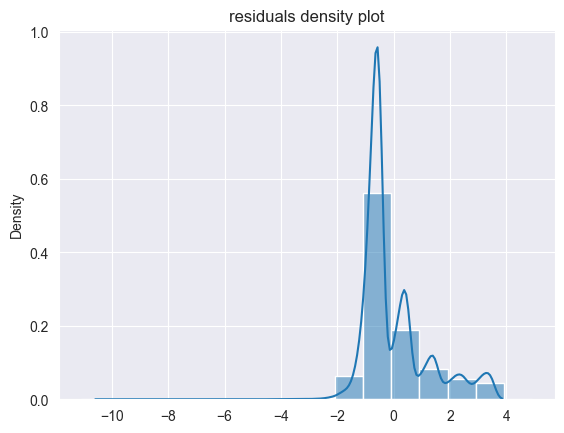

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

Text(0.5, 1.0, 'distribution of predicted and actual values')

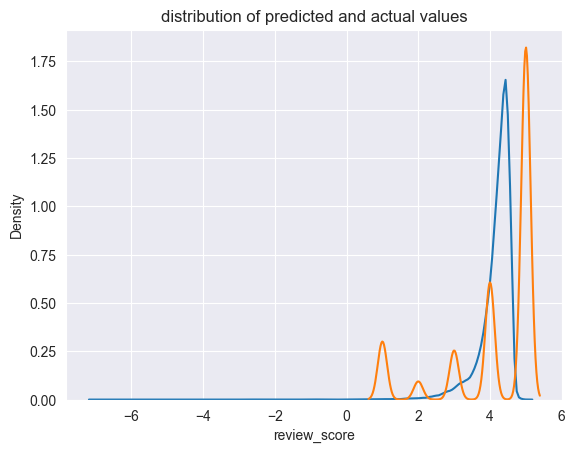

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

(0.0, 5.942038100814559)

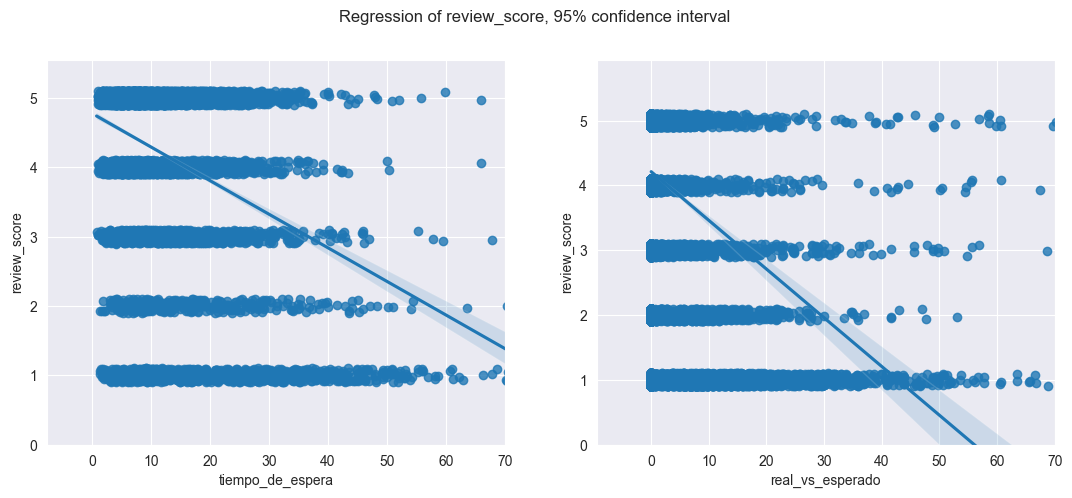